# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 8ο Εργαστήριο - *Ο Αλγόριθμος Bellman - Ford*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

<b><h3>Ερωτήσεις</h3></b>
<ul>
<li>Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου <i>Bellman-Ford</i>.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παραπάνω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11</b>;</li>
<li>Το <b>AS #2</b> εξετάζει την προσθήκη μιας ζεύξης είτε με το <b>AS #4</b> ή με το <b>AS #1</b>. Οι ζεύξεις αυτές φαίνονται στον παραπάνω γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το <b>AS #2</b> την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το <b>AS #2</b> για να είναι μικρότερο το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11;</b></li>
<li>Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη <b>AS #2</b> – <b>AS #3</b> παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11</b>; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;</li>
<li>Έστω ότι αποκαθίσταται η βλάβη. Το <b>AS #12</b> προσφέρεται να ενώσει τα <b>AS #10</b> και <b>AS #11</b> απ’ ευθείας στο <b>AS #3</b>. Το <b>AS #12</b> μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος <b>AS #2</b> – <b>AS #11</b>; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;</li>
</ul>
<br>
<i><p align="justify">Για την επιλύση της άσκησης θα χρησιμοποιήσετε τη βιβλιοθήκη της Python <a href="https://pypi.org/project/bellmanford/">bellmanford</a></p></i>

### Ερώτηση 1

>*Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου Bellman-Ford.*

Ο αλγόριθμος των *Bellman - Ford* είναι ένας αλγόριθμος ο οποίος υπολογίζει τα συντομότερα μονοπάτια από έναν αφετηριακό κόμβο $s\in V$ σε κάθε οποιονδόποτε άλλο κόμβο $v\in V$ πάνω σε ένα κατευθυντό γράφημα $G=(V,E)$ το οποίο έχει «βάρη» στις ακμές του. Με τον όρο βάρη εννοούμε ότι υπάρχει μια συνάρτηση $w:E\to \mathbb{R}$ η οποία αντιστοιχεί σε κάθε ακμή $(u,v)$ του γράφου μια πραγματική τιμή $w(u,v)$. Σημειώνεται επίσης ότι τα βάρη μπορεί να παίρνουν και αρνητικές τιμές. Στο παρακάτω σχήμα βλέπουμε έναν κατευθυντό γράφο με αρνητικά βάρη.

<center> <img src="https://github.com/ChrisNick92/StochasticsLabPublic/blob/master/lab8/graph1.png?raw=true" width="1500" /> </center>

Ένα παράδειγμα ενός κατευθυντού γράφου $G=(V,E)$ με αρνητικά βάρη είναι ο γράφος που αποτελείται από κόμβους που εκφράζουν κάποιους προορισμούς και ακμές $(u,v)$ αν και μόνο αν υπάρχει διαδρομή από τον προορισμό $u$ στο $v$. Στη περίπτωση που κάθε διαδρομή επιφέρει ένα κόστος (π.χ. χρηματικό) τότε ο γράφος θα έχει ακμές με αρνητικά βάρη.<br>

Σε αδρές γραμμές, ο αλγόριθμος λειτουργεί μέσω μιας διαδικασίας «χαλάρωσης» (relaxation) κατά την οποία «διορθώνει» συνεχώς τις διαδρομές από έναν κόμβο $v$ σε έναν $u$ αντικαθιστώντας αυτές τις διαδρομές με διαδρομές μικρότερου κόστους μέχρις ότου να μη γίνεται καμία περαιτέρω αλλαγή. Αξίζει να σημειωθεί ότι η πολυπλοκότητα του αλγορίθμου είναι $O(|V|\cdot |E|)$, όπου $|V|$ είναι ο πληθάριθμος του $V$ και αντίστοιχα $|E|$ ο πληθάριθμος του συνόλου των ακμών.

### Ερώτηση 2

>*Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παρακάτω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11*

<center> <img src="https://github.com/ChrisNick92/StochasticsLabPublic/blob/master/lab8/bellman-topology.png?raw=true" width="1000" /> </center>

Αρχικά εγκαθιστούμε τη βιβλιοθήκη της Python <a href="https://pypi.org/project/bellmanford/">bellmanford</a> που θα χρησιμοποιήσουμε για να εκτελέσουμε τον αλγόριθμο των Bellman - Ford στον γράφο του παραπάνω σχήματος.

In [1]:
!pip install bellmanford

In [2]:
!pip install networkx

Κατασκευάζουμε το γράφημα της παραπάνω εικόνας μέσω της βιβλιοθήκης <a href="https://networkx.org">networkx</a> και αποθηκεύουμε τον γράφο στη μεταβλητή `G`.

In [3]:
import bellmanford as bf
import networkx as nx

# Initializing the Graph
G = nx.Graph()
elist = [('AS#2', 'AS#4', 4.0), ('AS#2', 'AS#1', 10.0), ('AS#2', 'AS#3', 4.0), ('AS#1', 'AS#3', 4.0), ('AS#3', 'AS#12', 2.0),
         ('AS#3', 'AS#5', 2.0), ('AS#4', 'AS#5', 20.0), ('AS#5', 'AS#6', 5.0), ('AS#5', 'AS#6', 2.0), ('AS#6', 'AS#7', 4.0),
         ('AS#7', 'AS#8', 3.0), ('AS#12', 'AS#10', 2.0), ('AS#12', 'AS#11', 4.0), ('AS#10', 'AS#9', 3.0), ('AS#11', 'AS#9', 4.0),
         ('AS#9', 'AS#13', 5.0), ('AS#9', 'AS#8', 7.0), ('AS#13', 'AS#8', 4.0), ("AS#5", "AS#7", 2.0)]
G.add_weighted_edges_from(elist)

Παρακάτω ορίζουμε μια συνάρτηση για να «πλοττάρουμε» τα γραφήματα που θα χρησιμοποιήσουμε σε αυτό το Notebook.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(G,elist, pos, red_node = True,
               title = 'The Graph to be Bellman - Ford-ed!', color_path = None,
               label = None):
  edges = {}
  for item in elist:
    edges[item[0],item[1]] = item[2]
  edgelist = list(edges.keys())
  edge_color = None
  width = None
  
  if color_path != None:
    colored_nodes = []
    for i in range(len(color_path)-1):
      colored_nodes.append({color_path[i], color_path[i+1]})
    edge_color = []
    width = []
    edge_set_list = []
    for edge in edgelist:
      edge_set_list.append({edge[0], edge[1]})
    for edge in edgelist:
      if {edge[0], edge[1]} in colored_nodes:
        width.append(4.0)
        edge_color.append('green')
      else:
        width.append(1.0)
        edge_color.append('black')
  
  temp_pos = pos.copy()
  if red_node == False:
    del temp_pos["AS#12"]

  sns.set_style("dark")

  fig, ax = plt.subplots(figsize = (14,10))
  nx.draw_networkx_labels(G, pos = temp_pos, ax = ax)
  nx.draw_networkx_nodes(G, pos = temp_pos, ax = ax, node_size = 1000)
  nx.draw_networkx_edge_labels(G, pos = temp_pos, ax = ax, edge_labels = edges)
  nx.draw_networkx_edges(G,pos = temp_pos, edgelist = edgelist,
                         edge_color = edge_color, width = width,
                         label = label)

  ax.set_title(title, fontsize = 15)
  return ax

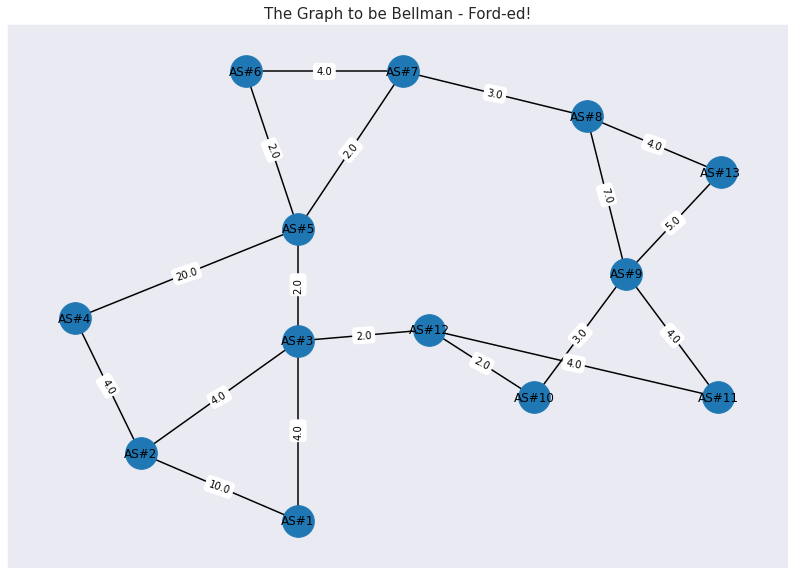

In [5]:
pos = {"AS#2": [0.0,0.0], "AS#1":[2*0.6,-0.3*2], "AS#3":[2*0.6,2*0.5], "AS#12":[2*1.1,2*0.55], "AS#4": [-0.25*2,2*0.6],
       "AS#10": [2*1.5, 2*0.25], "AS#11":[2*2.2, 2*0.25], "AS#9": [2*1.85, 2*0.8], "AS#13":[2*2.21 ,2*1.25],
       "AS#5":[2*0.6, 2*1.0], "AS#6":[2*0.4, 2*1.7], "AS#7":[2*1, 2*1.7], "AS#8":[2*1.7, 2*1.5]}

ax = plot_graph(G, elist, pos)
plt.show()

Πρώτα θεωρούμε τον υπογράφο $G'$ (`G_prime`) του $G$ ο οποίος αποτελείται μόνο από τις συνεχείς μαύρες γραμμές.

In [6]:
# Initializing the Graph G_prime
G_prime = nx.Graph()
elist_prime = [('AS#2', 'AS#3', 4.0), ('AS#1', 'AS#3', 4.0),
         ('AS#3', 'AS#5', 2.0), ('AS#4', 'AS#5', 20.0), ('AS#5', 'AS#6', 5.0), ('AS#5', 'AS#6', 2.0), ('AS#6', 'AS#7', 4.0),
         ('AS#7', 'AS#8', 3.0),('AS#10', 'AS#9', 3.0), ('AS#11', 'AS#9', 4.0),
         ('AS#9', 'AS#13', 5.0), ('AS#9', 'AS#8', 7.0), ('AS#13', 'AS#8', 4.0), ("AS#5", "AS#7", 2.0)]
G_prime.add_weighted_edges_from(elist_prime)

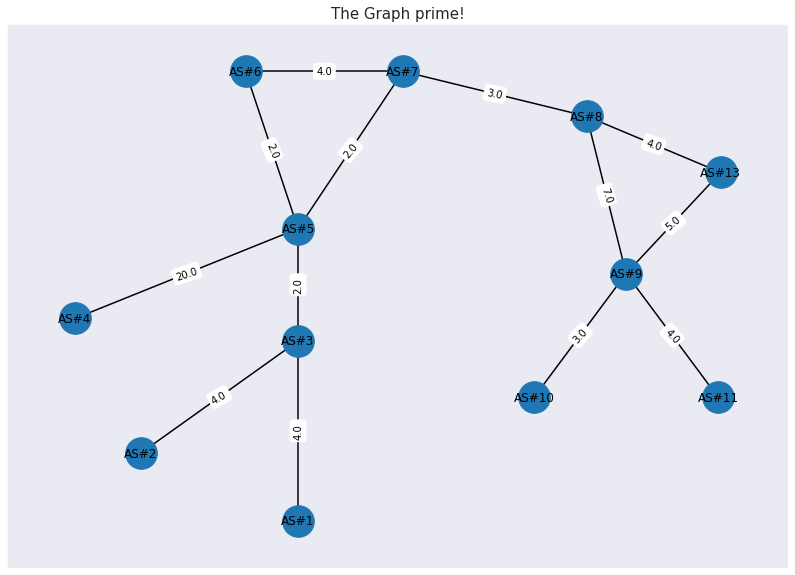

In [7]:
ax = plot_graph(G_prime, elist_prime, pos, red_node= False,
           title = "The Graph prime!")
plt.show()

Παρακάτω εκτελούμε τον αλγόριθμο Bellman - Ford βάζοντας την παράμετρο `source` τον κόμβο AS#2 και ως στόχο (`target`) τον κόμβο AS#11. Δηλαδή, θα βρούμε το βέλτιστο μονοπάτι στον παραπάνω γράφο ξεκινώντας από τον κόμβο AS#2 και καταλήγοντας στον AS#11.

In [8]:
length, nodes, negative_cycle = bf.bellman_ford(G_prime, source = "AS#2",
                                                target = "AS#11", weight = "weight")

In [9]:
print(f"- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι:{length}")
print(f"- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το:{nodes}")

- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι:22.0
- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το:['AS#2', 'AS#3', 'AS#5', 'AS#7', 'AS#8', 'AS#9', 'AS#11']


Στο επόμενο σχήμα βλέπουμε το μονοπάτι του δέντρου Bellman - Ford από το σημείο AS#2 εως το σημείο AS#11 καθώς και τα αντίστοιχα βάρη ανά ακμή.

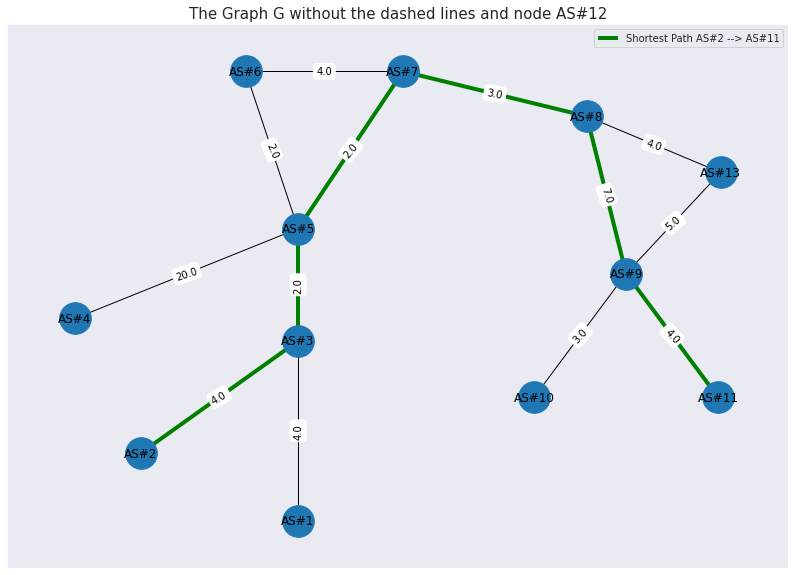

In [10]:
ax = plot_graph(G_prime, elist_prime, pos, red_node = False,
                title = 'The Graph G without the dashed lines and node AS#12', color_path = nodes,
                label = 'Shortest Path AS#2 --> AS#11')

plt.legend()
plt.show()

### Ερώτηση 3

>*Το AS #2 εξετάζει την προσθήκη μιας ζεύξης είτε με το AS #4 ή με το AS #1. Οι ζεύξεις αυτές φαίνονται στον αρχικό γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το AS #2 την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το AS #2 για να είναι μικρότερο το κόστος της διαδρομής από το AS #2 μέχρι το AS #11;*

Απ' το αρχικό σχήμα του γράφου βλέπουμε ότι καμία απ' τις δύο ζεύξεις δε θα επιφέρει μικρότερο κόστος διαδρομής εάν υπάρχει η επιλογή της ζεύξης που ενώνει το AS#2 με το AS#3. Παρ' όλα αυτά, ο μόνος λόγος για να χρειαστεί κάποια απ' τις δύο επιπλέον ζεύξεις είναι σε περίπτωση που χαλάσει η ζεύξη AS#2-->AS#3 και έτσι θα υπάρχει και δεύτερο μονοπάτι που να οδηγεί απ' τον AS#2 στον AS#11. Παρακάτω αρχικοποιούμε τους γράφους που προκύπτουν απ' τις δύο αυτές ζεύξεις και εξετάζουμε εκτελώντας τον αλγόριθμο Bellman - Ford ποια απ' τις δύο είναι η καλύτερη επιλογή.

In [11]:
G1 = nx.Graph()
elist1 = [('AS#2', 'AS#4', 4.0), ('AS#1', 'AS#3', 4.0),
         ('AS#3', 'AS#5', 2.0), ('AS#4', 'AS#5', 20.0), ('AS#5', 'AS#6', 5.0), ('AS#5', 'AS#6', 2.0), ('AS#6', 'AS#7', 4.0),
         ('AS#7', 'AS#8', 3.0),('AS#10', 'AS#9', 3.0), ('AS#11', 'AS#9', 4.0),
         ('AS#9', 'AS#13', 5.0), ('AS#9', 'AS#8', 7.0), ('AS#13', 'AS#8', 4.0), ("AS#5", "AS#7", 2.0)]
G1.add_weighted_edges_from(elist1)

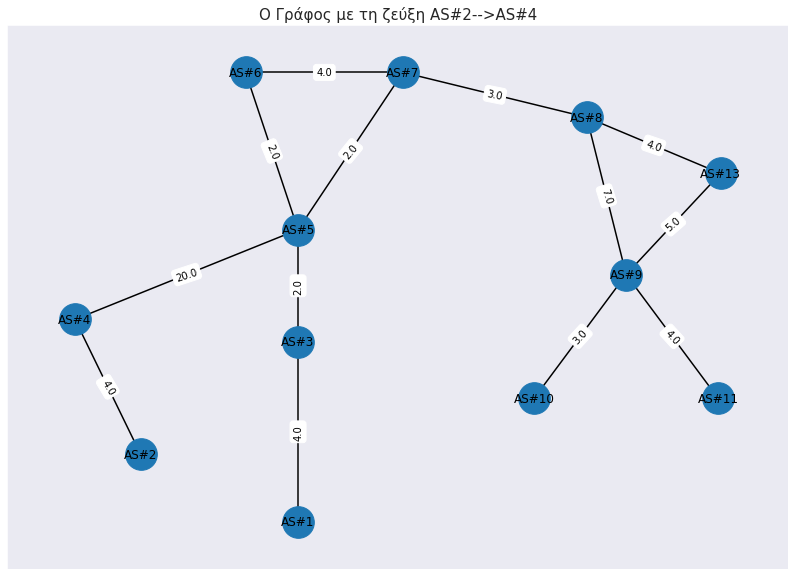

In [12]:
ax = plot_graph(G1, elist1, pos, title = "Ο Γράφος με τη ζεύξη AS#2-->AS#4")
plt.show()

Παρακάτω βλέπουμε και τα αποτελέσματα της βέλτιστης διαδρομής

In [13]:
length1, nodes1, negative_cycle1 = bf.bellman_ford(G1, source = "AS#2",
                                                target = "AS#11", weight = "weight")
print(f"- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι:{length1}")
print(f"- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το:{nodes1}")

- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι:40.0
- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το:['AS#2', 'AS#4', 'AS#5', 'AS#7', 'AS#8', 'AS#9', 'AS#11']


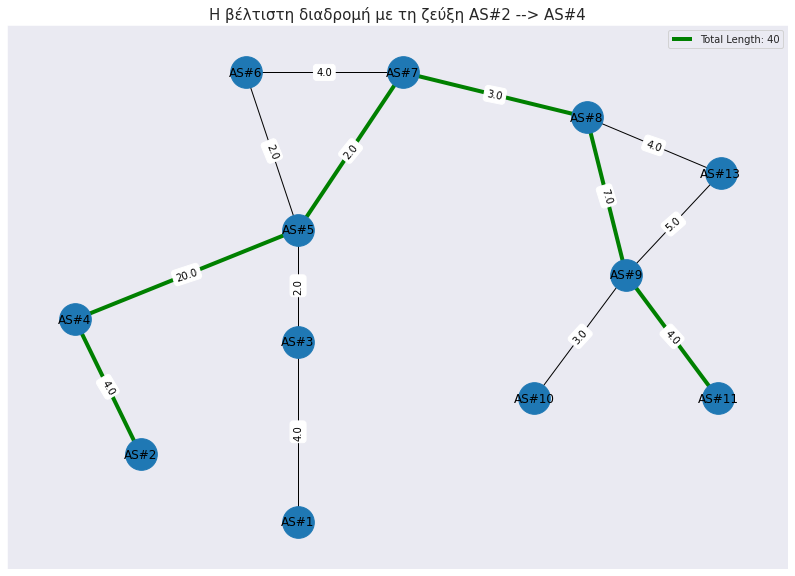

In [14]:
ax = plot_graph(G1, elist1, pos, red_node = False,
                title = 'Η βέλτιστη διαδρομή με τη ζεύξη AS#2 --> AS#4', color_path = nodes1,
                label = 'Total Length: '+str(int(length1)))

plt.legend()
plt.show()

Τώρα βλέπουμε και αντίστοιχα αποτελέσματα που προκύπτουν όταν έχουμε μονο τη ζεύξη AS#2 --> AS#1

In [15]:
G2 = nx.Graph()
elist2 = [('AS#2', 'AS#1', 10.0),('AS#1', 'AS#3', 4.0),
         ('AS#3', 'AS#5', 2.0), ('AS#4', 'AS#5', 20.0), ('AS#5', 'AS#6', 5.0), ('AS#5', 'AS#6', 2.0), ('AS#6', 'AS#7', 4.0),
         ('AS#7', 'AS#8', 3.0),('AS#10', 'AS#9', 3.0), ('AS#11', 'AS#9', 4.0),
         ('AS#9', 'AS#13', 5.0), ('AS#9', 'AS#8', 7.0), ('AS#13', 'AS#8', 4.0), ("AS#5", "AS#7", 2.0)]
G2.add_weighted_edges_from(elist2)

In [16]:
length2, nodes2, negative_cycle2 = bf.bellman_ford(G2, source = "AS#2",
                                                target = "AS#11", weight = "weight")
print(f"- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 με τη ζεύξη AS#2 --> AS#1 είναι: {length2}")
print(f"- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το: {nodes2}")

- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 με τη ζεύξη AS#2 --> AS#1 είναι: 32.0
- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το: ['AS#2', 'AS#1', 'AS#3', 'AS#5', 'AS#7', 'AS#8', 'AS#9', 'AS#11']


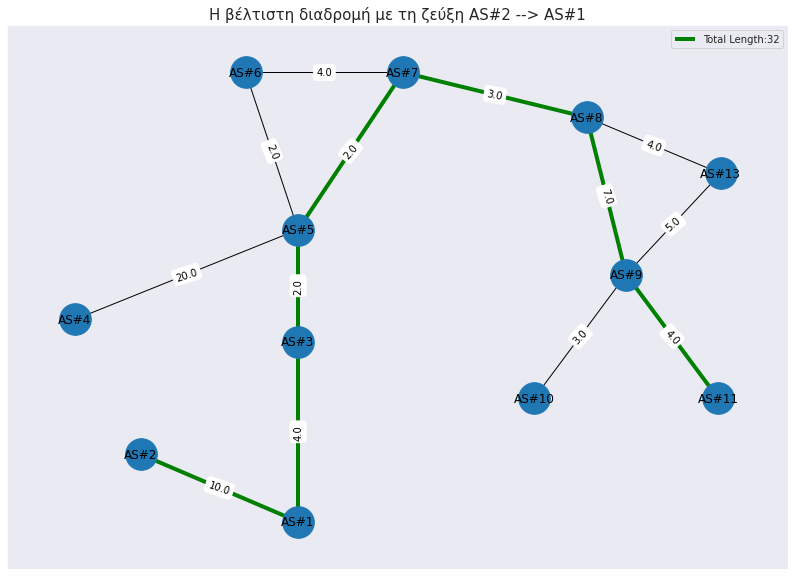

In [17]:
ax = plot_graph(G2, elist2, pos, red_node = False,
                title = 'Η βέλτιστη διαδρομή με τη ζεύξη AS#2 --> AS#1', color_path = nodes2,
                label = 'Total Length:'+str(int(length2)))

plt.legend()
plt.show()

Όπως βλέπουμε σε περίπωση που χρειαστεί να προστεθεί κάποια ζεύξη στο σύστημα αυτή που πρέπει να προτιμηθεί είναι ζεύξη AS#2 --> AS#1 καθώς το κόστος διαδρομής της είναι 32 σε σχέση με το κόστος διαδρομής που περιέχει τη ζεύξη AS#2 --> AS#4.

### Ερώτημα 4

>*Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη AS #2 – AS #3 παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το AS #2 μέχρι το AS #11; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;*

Στον παρακάτω πίνακα συνοψίζουμε τα αποτελέσματα που έχουμε βρει στα προηγούμενα ερωτήματα.


| **Διαδρομή μέσω της ζεύξης** | **Κόστος Διαδρομής**|
|:---------------|:-----------------|
| **AS#2 --> AS#3** |       22      |
| **AS#2 --> AS#4**      |       40     |
| **AS#2 --> AS#1**   |      32   |  

Απ' τον παραπάνω πίνακα παρατηρούμε ότι συντομότερη απ' όλες είναι η διαδρομή που περιέχει τη ζεύξη AS#2 --> AS#3 με κόστος 22 και μετά ακολουθεί η διαδρομή της ζεύξης AS#2 --> AS#1 κόστος 32. Έτσι, με την προσθήκη της ζεύξης AS#2 --> AS#1 σε περίπτωση βλάβης της AS#2 --> AS#3 η διαδρομή θα έχει επιβαρυνθεί κατά 10 μονάδες.

### Ερώτημα 5

>*Έστω ότι αποκαθίσταται η βλάβη. Το AS #12 προσφέρεται να ενώσει τα AS #10 και AS #11 απ’ ευθείας στο AS #3. Το AS #12 μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος AS #2 – AS #11; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;*

Σε αυτό το σημείο χρησιμοποιούμε τον πλήρη γράφο, έχοντας προσθέσει και τον κόμβο AS#12. Παρακάτω βλέπουμε το σχήμα ολόκληρου του γράφου.

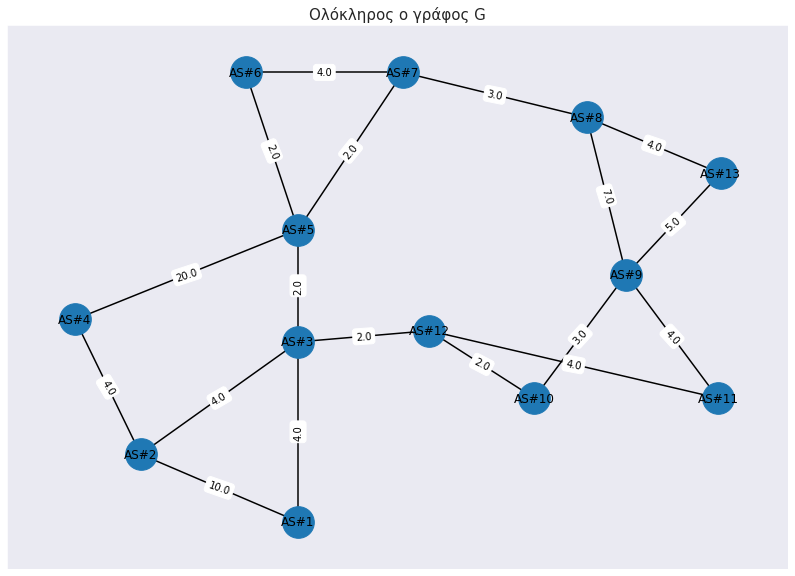

In [19]:
ax = plot_graph(G, elist, pos, title = 'Ολόκληρος ο γράφος G')
plt.show()

Εκτελούμε τον αλγόριθμο Bellman - Ford στον παραπάνω γράφο και συνοψίζουμε το αποτέλεσμα που παίρνουμε μαζί με όλα τα προηγούμενα αποτελέσματα και συγκρίνουμε.

In [20]:
length, nodes, negative_cycle = bf.bellman_ford(G, source = "AS#2",
                                                target = "AS#11", weight = "weight")
print(f"- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι: {length}")
print(f"- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το: {nodes}")

- Το συνολικό κόστος της διαδρομής από τον κόμβο AS#2 στον AS#11 είναι: 10.0
- Το αντίστοιχο μονοπάτι του δέντρου Bellman - Ford είναι το: ['AS#2', 'AS#3', 'AS#12', 'AS#11']


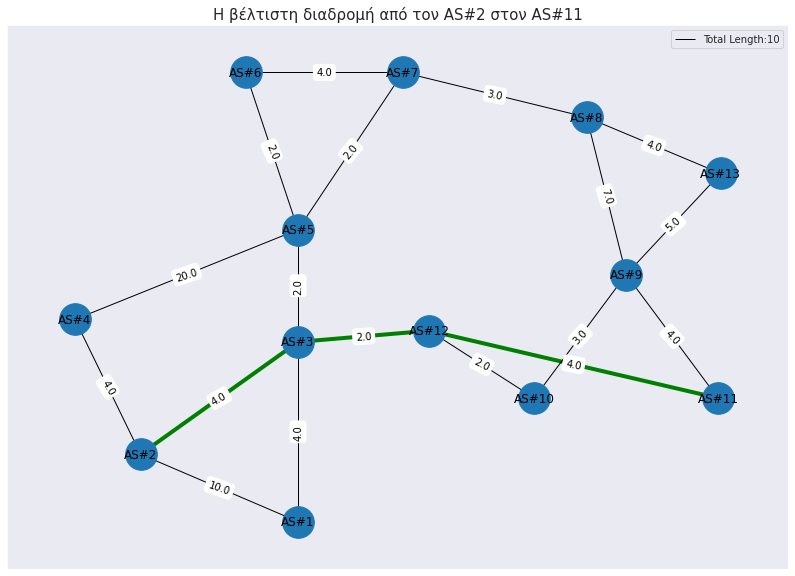

In [22]:
ax = plot_graph(G, elist, pos,
                title = 'Η βέλτιστη διαδρομή από τον AS#2 στον AS#11', color_path = nodes,
                label = 'Total Length:'+str(int(length)))

plt.legend()
plt.show()

| **Διαδρομή μέσω της ζεύξης** | **Κόστος Διαδρομής**|
|:---------------|:-----------------|
| **Ολόκληρος ο Γράφος** |       10      |
| **AS#2 --> AS#3** |       22      |
| **AS#2 --> AS#4**      |       40     |
| **AS#2 --> AS#1**   |      32   |  

Όπως παρατηρούμε και απ' τον παραπάνω πίνακα η βέλτιστη διαδρομή έχει συνολικό κόστος 10 μονάδες και έτσι το συνολικό κόστος βελτιώνεται κατά 12 μονάδες απ' τη δεύτερη καλύτερη επιλογή.<br><br>


<b>Λίγα λόγια για το GR-IX</b><br>

- Το GR-IX είναι το Ελληνικό Internet Exchange και αποτελεί έναν ουδέτερο και μη κερδοσκοπικό φορέας παροχής Internet. Το GR-IX είναι το μοναδικό ουδέτερο Internet Exchange στην Ελλάδα. Αποτελεί μια σημαντική εθνική υποδομή που διασυνδέει τις σημαντικότερες εταιρίες διαδικτύου στην Ελλάδα, όπως πάροχους υπηρεσιών Internet, πάροχους περιεχομένου κλπ. Ο κύριος στόχος του GR-IX είναι η επιτάχυνση της ανάπτυξης του Ελληνικού Internet. 